In [2]:
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fftpack import idct, dct

In [3]:
from gbm import estimate_parameters
from uncond_ts_diff.custom_dataset import get_custom_dataset


In [4]:
prediction_length = 1
n = 200
nums_of_datasets = 2

In [5]:
plt.style.use('seaborn')

/tmp/ipykernel_3482902/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
def plot_gbm(St, n, M, dt):
    time = np.linspace(0, n * dt, St.shape[0])
    tt = np.full(shape=(M, St.shape[0]), fill_value=time).T
    plt.plot(tt, St)
    plt.xlabel("Years $(t)$")
    plt.ylabel("Stock Price $(S_t)$")
    plt.show()

def plot_freq(St, n, M, dt):
    time = np.linspace(0, n * dt, St.shape[0])
    tt = np.full(shape=(M, St.shape[0]), fill_value=time).T
    plt.plot(tt, St)
    plt.xlabel("Frequency $(f)$")
    plt.ylabel("Magnitude")
    # plt.xlim(0, 0.2)
    # plt.ylim(-2.5, 2.5)
    plt.show()


In [19]:

# for i in range(nums_of_datasets):
#     gbm_path = f'../results/cos_exp1/generation_log-{i}/'
#     data_path = gbm_path
#     real = np.load(data_path + 'real_samples.npy').T
#     synth = np.load(data_path + 'synth_samples.npy').T
    

#     plot_gbm(real, real.shape[0], real.shape[1], 1/n)

#     transformed_real = dct(real, axis=0, norm='ortho')
#     plot_freq(transformed_real, transformed_real.shape[0], transformed_real.shape[1], 1/n)
    
#     plot_freq(synth, synth.shape[0], synth.shape[1], 1/n)
#     recovered_synth = idct(synth, axis=0, norm='ortho')
#     plot_gbm(recovered_synth, recovered_synth.shape[0], recovered_synth.shape[1], 1/n)
    
#     real_params = estimate_parameters(real, 1/n, ret_distribution=True)
#     synth_params = estimate_parameters(recovered_synth, 1/n, ret_distribution=True)
    
#     # Create a new figure for the KDE plots of sigma
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(real_params[0], label='Real sigma', fill=True)
#     sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
#     plt.title('KDE of Sigma')
#     plt.xlabel('Sigma')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

#     # Create a new figure for the KDE plots of mu
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(real_params[1], label='Real mu', fill=True)
#     sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
#     plt.title('KDE of Mu')
#     plt.xlabel('Mu')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

#     print('-' * 100)
    
    
    
#     print('-'*100)

    


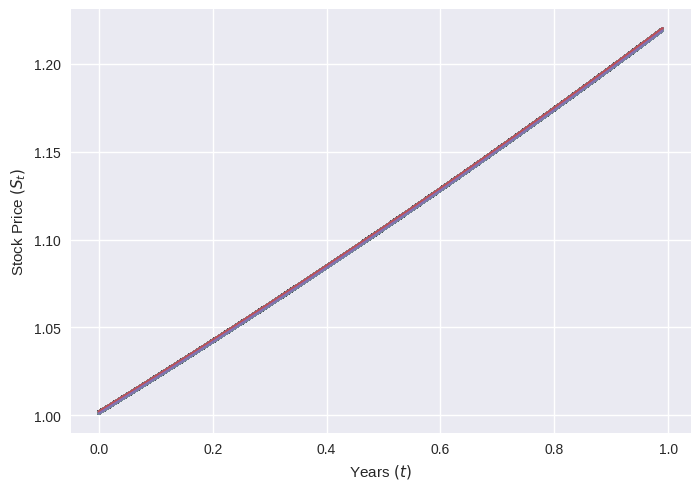

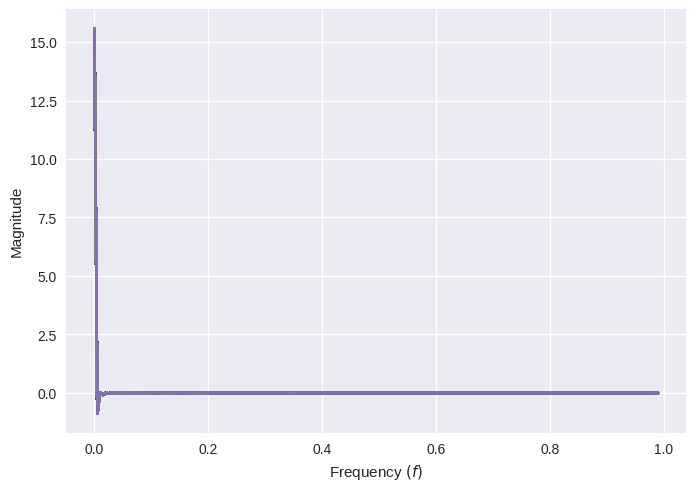

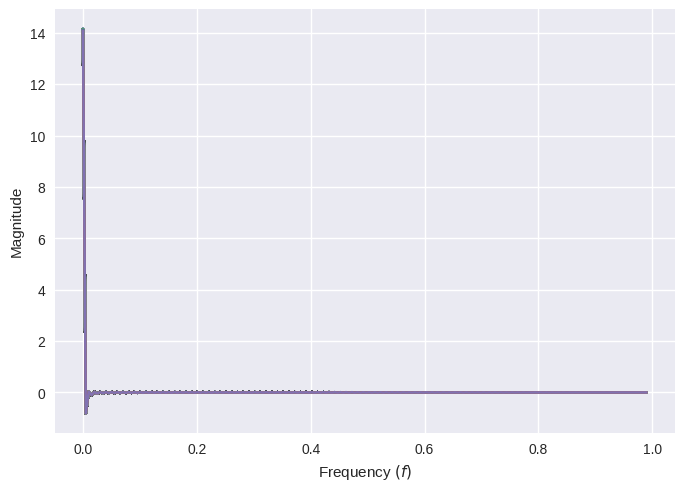

(195, 10000)


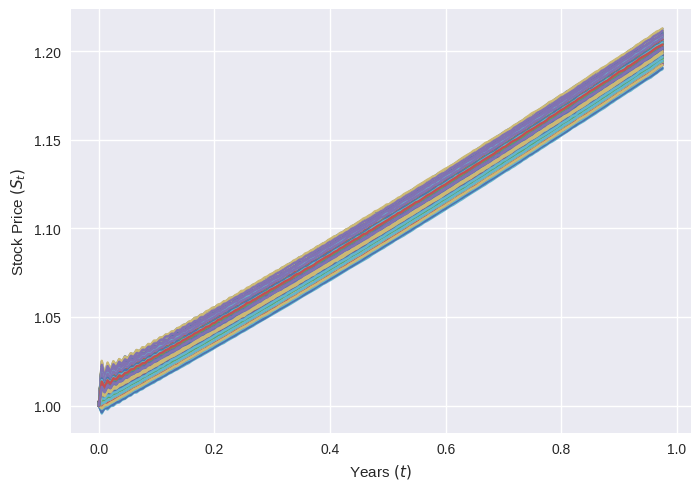

/tmp/ipykernel_3482902/1938193790.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(st_params[0], label='Real sigma', fill=True)


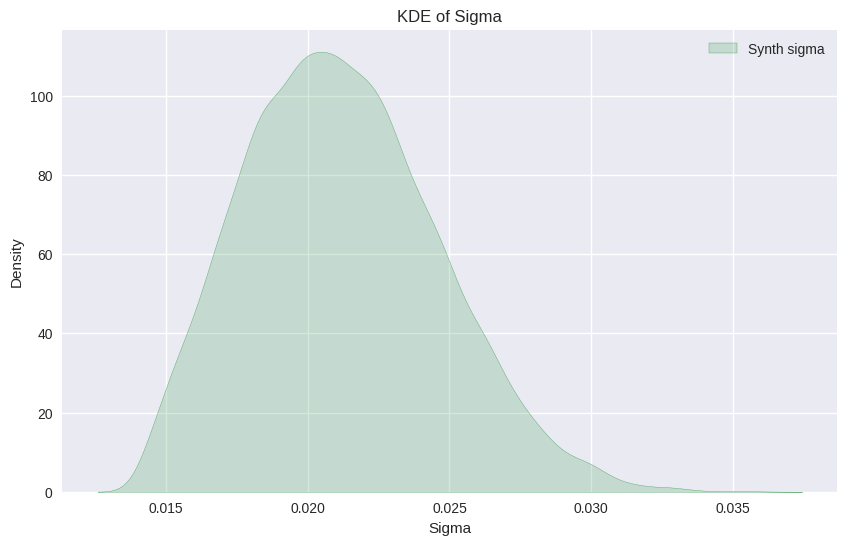

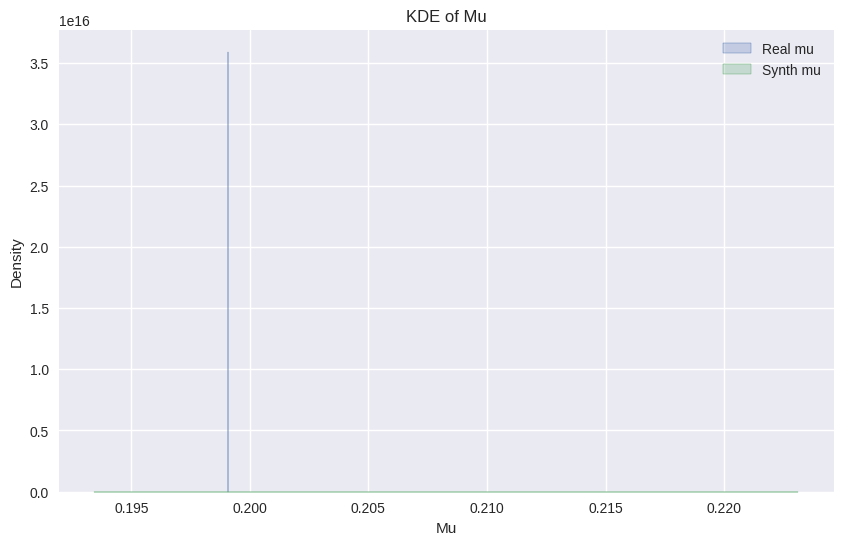

----------------------------------------------------------------------------------------------------


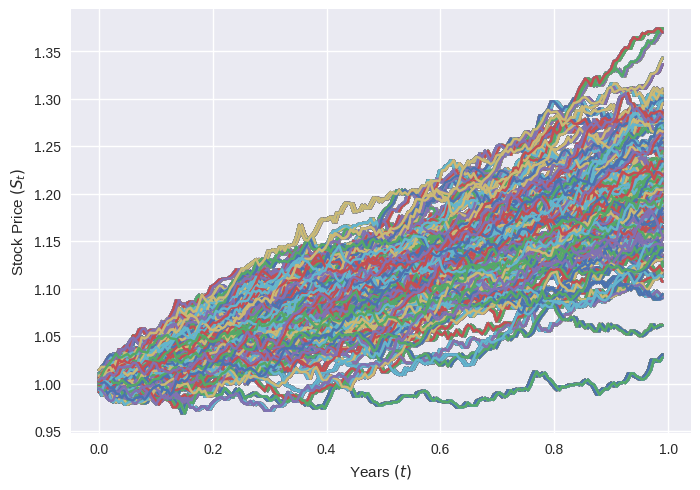

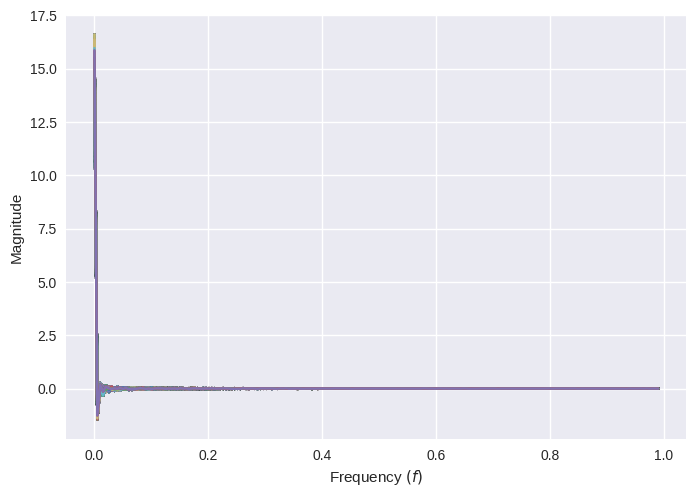

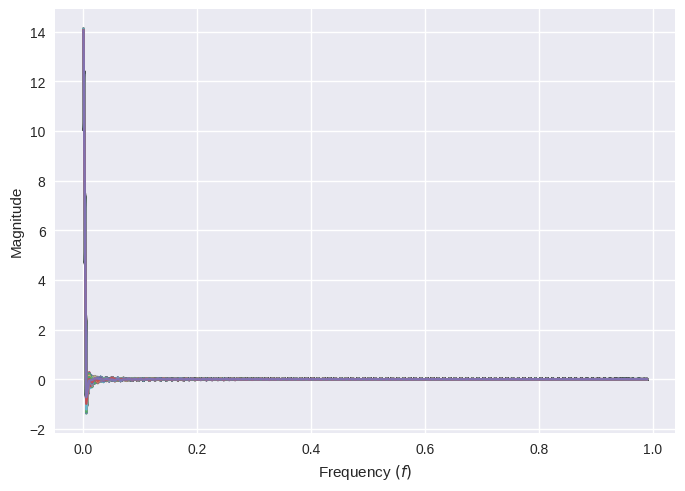

(195, 10000)


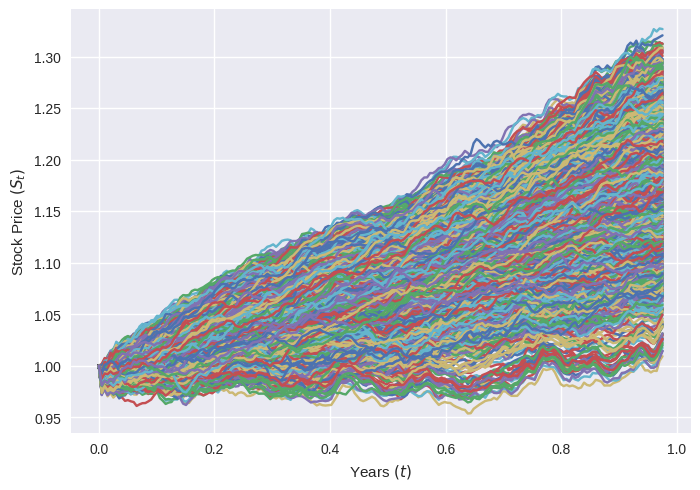

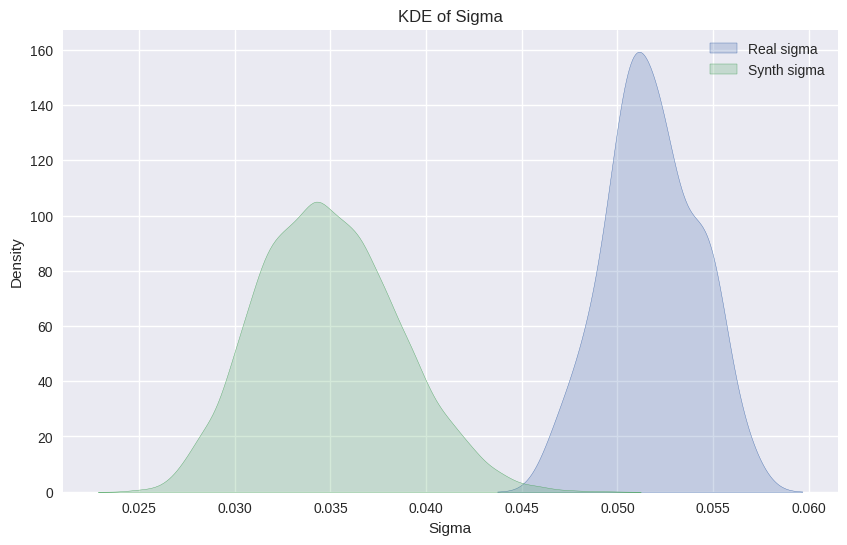

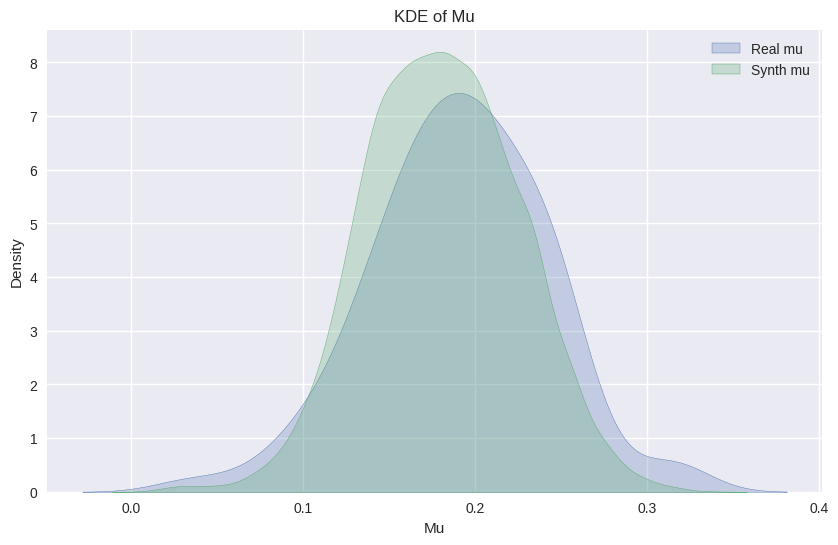

----------------------------------------------------------------------------------------------------


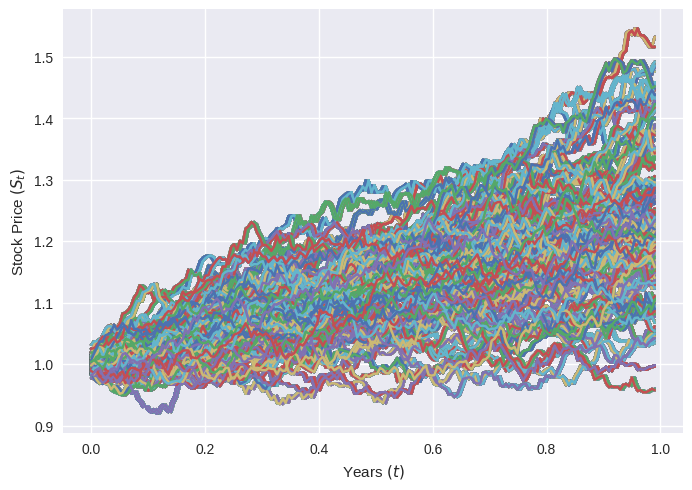

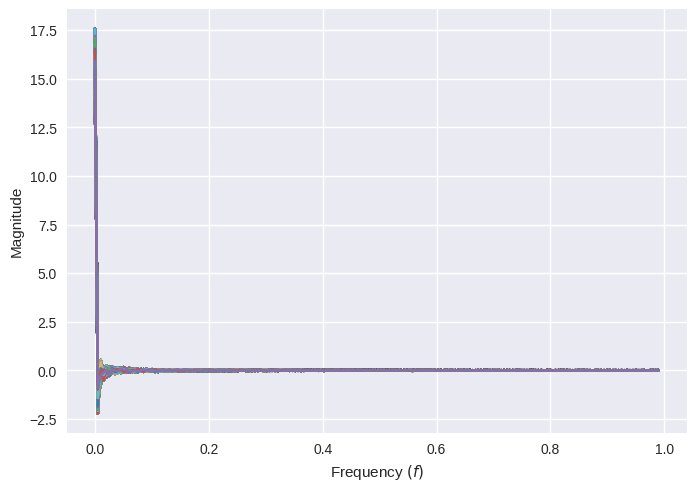

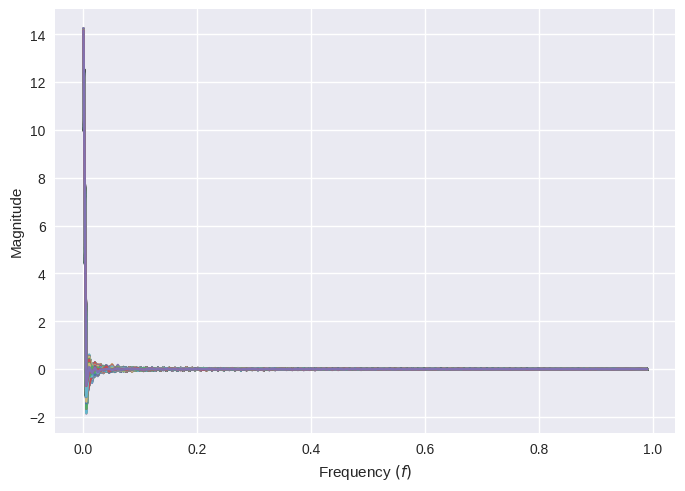

(195, 10000)


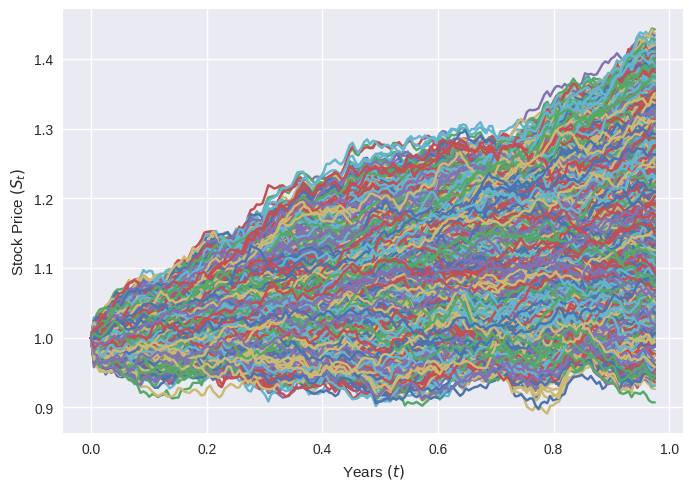

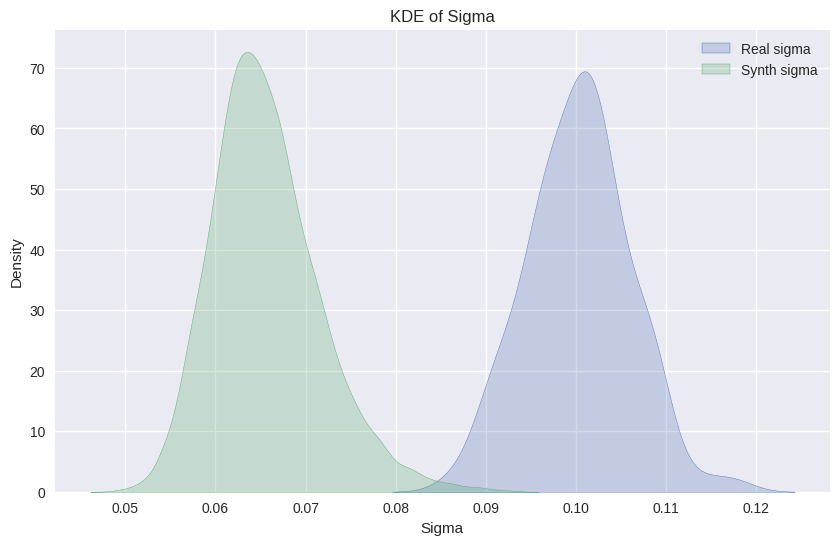

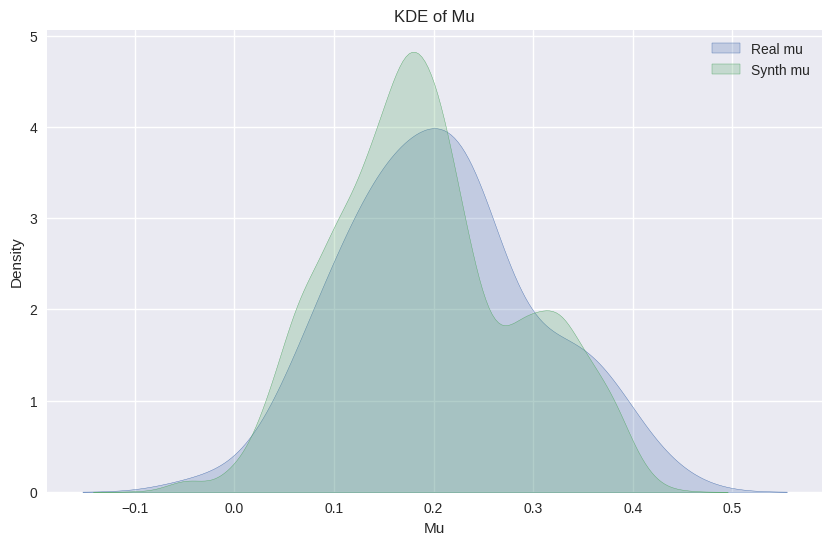

----------------------------------------------------------------------------------------------------


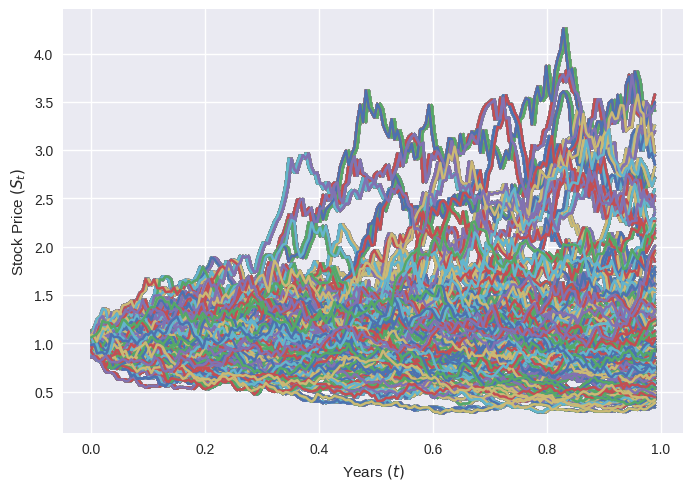

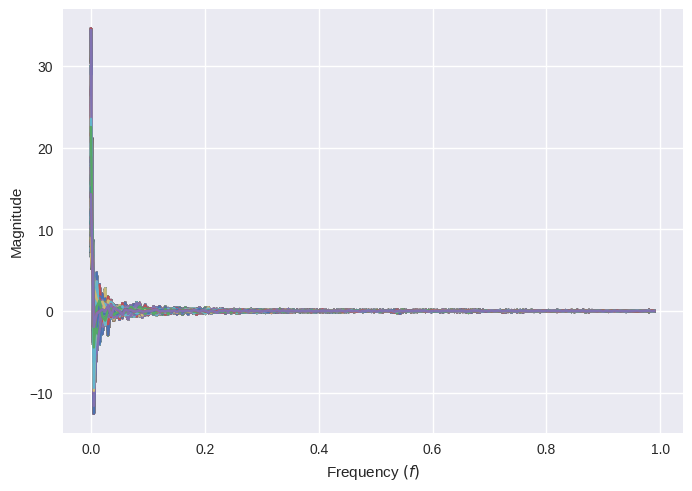

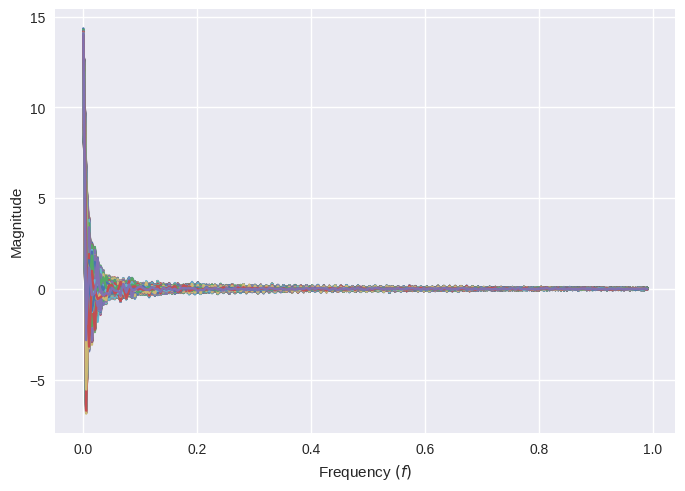

(195, 10000)


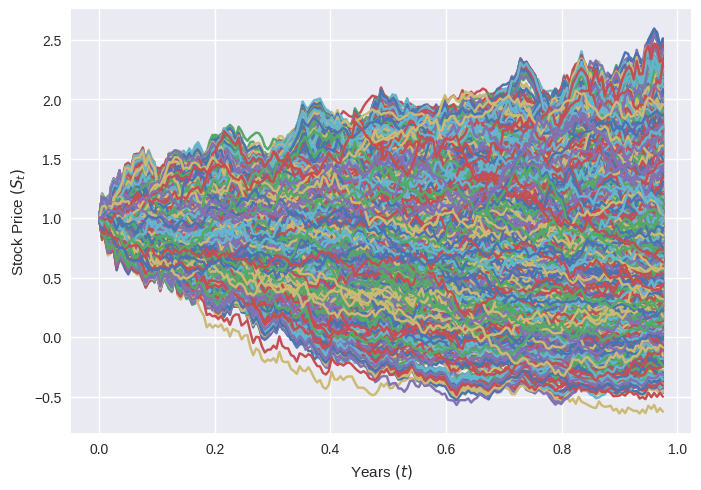

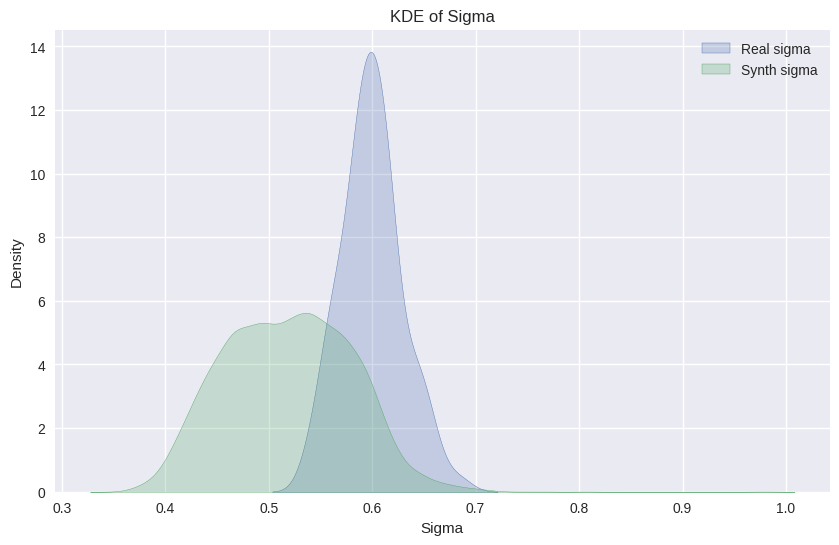

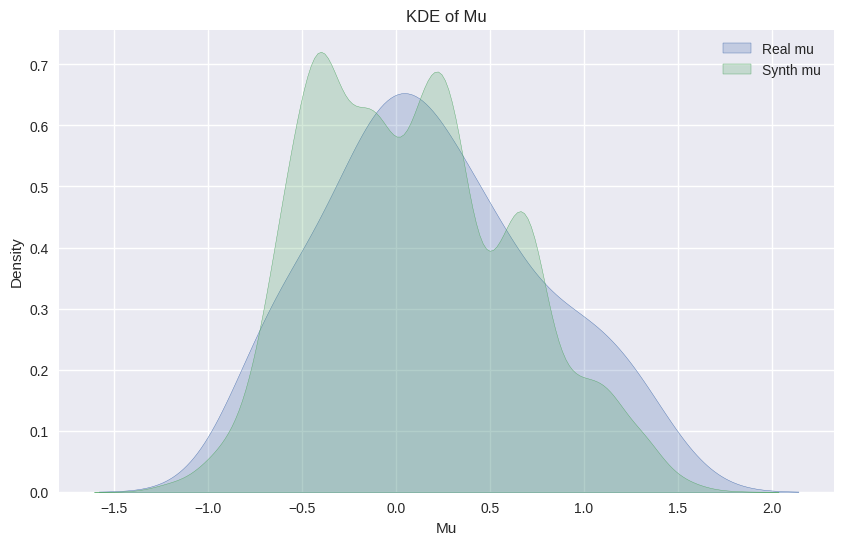

----------------------------------------------------------------------------------------------------


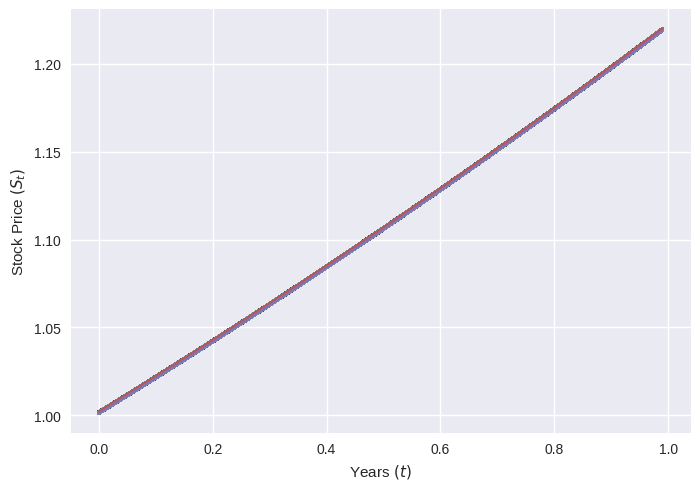

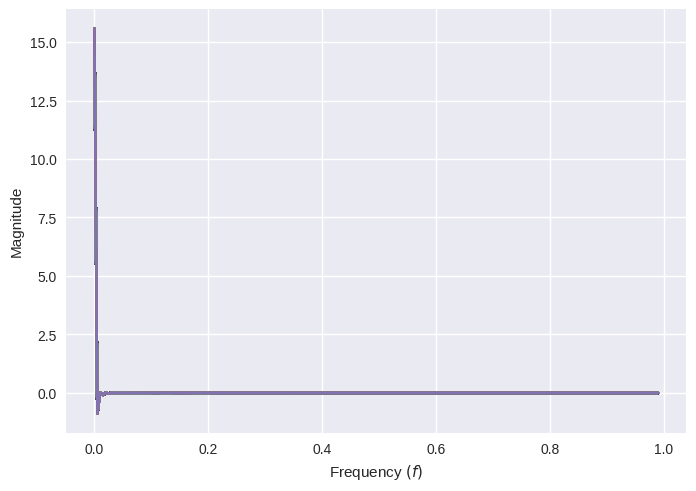

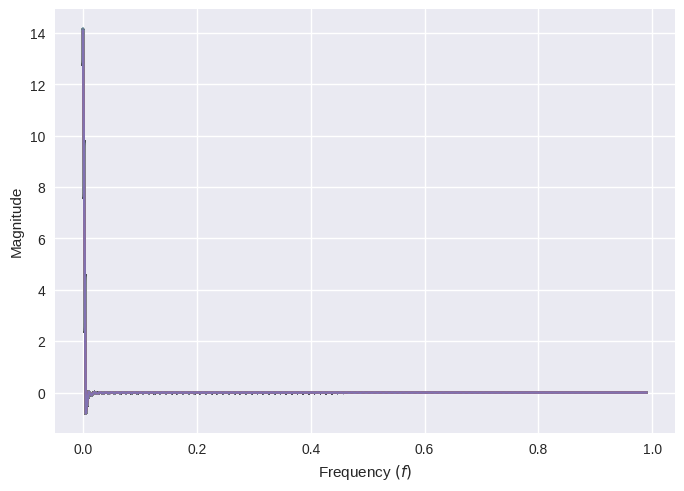

(195, 10000)


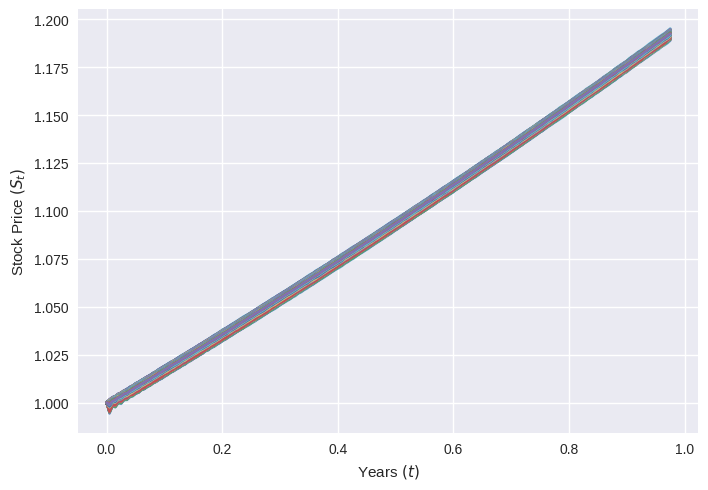

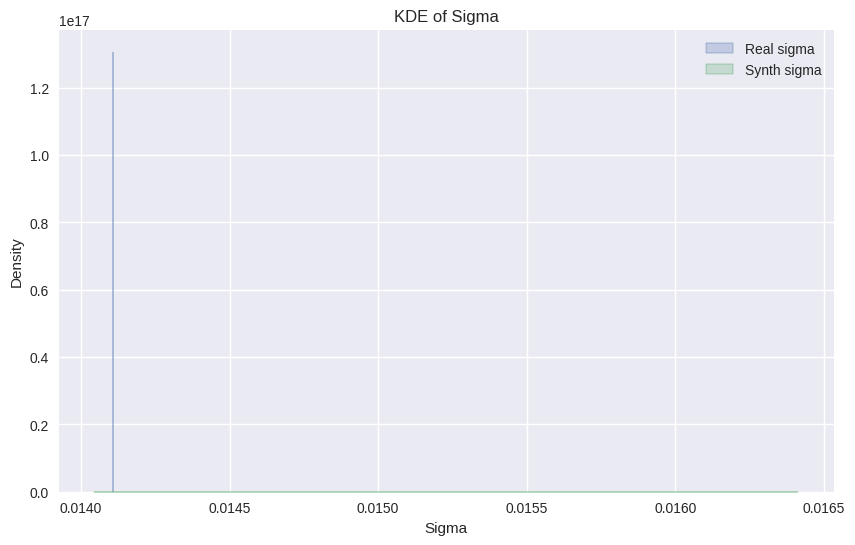

/tmp/ipykernel_3482902/1938193790.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(st_params[1], label='Real mu', fill=True)


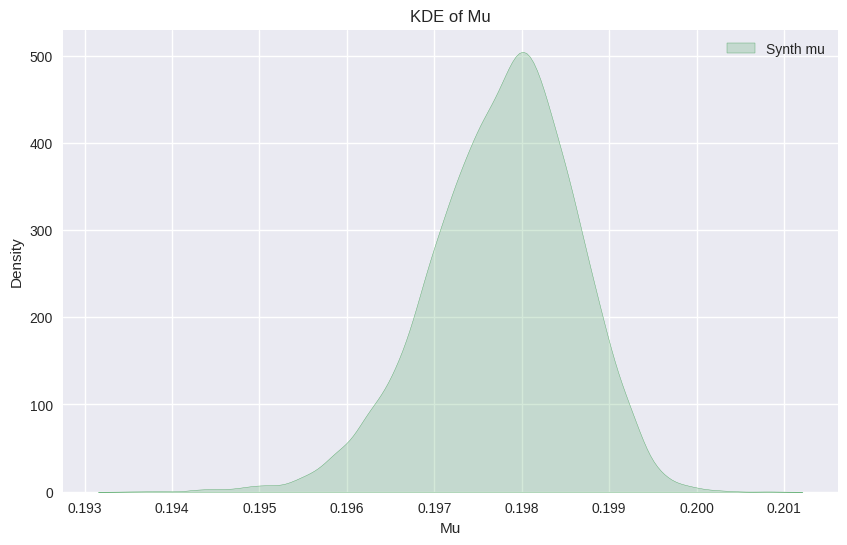

----------------------------------------------------------------------------------------------------


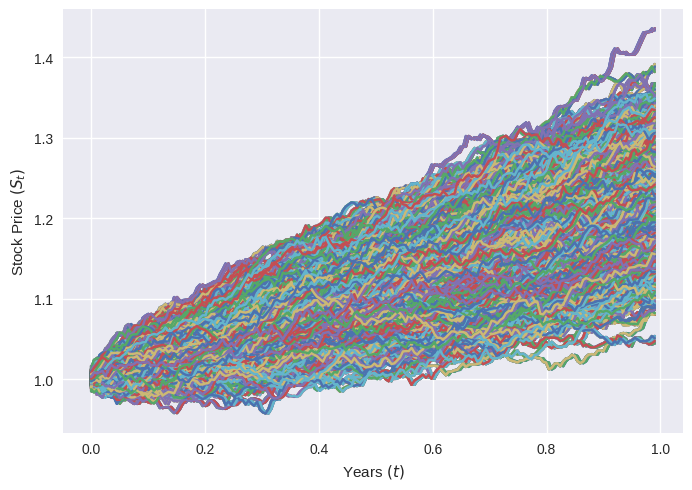

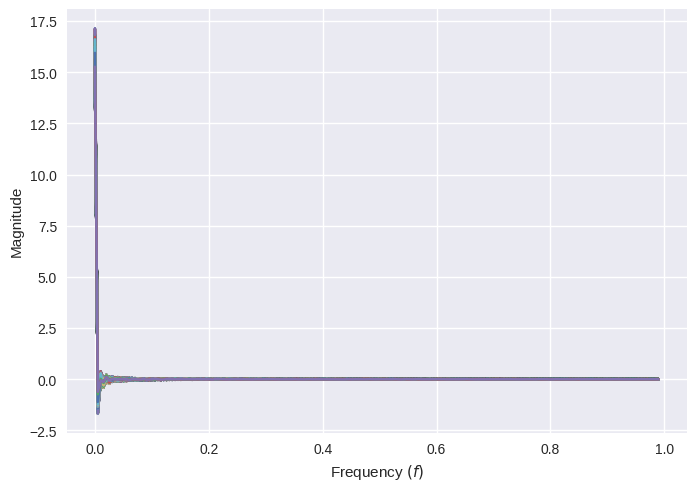

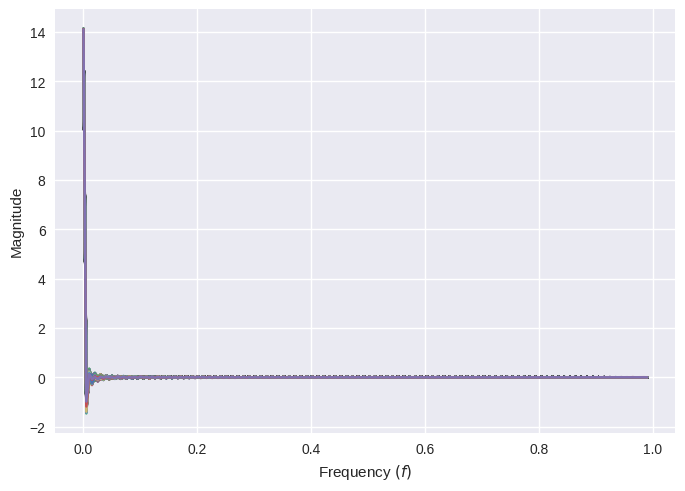

(195, 10000)


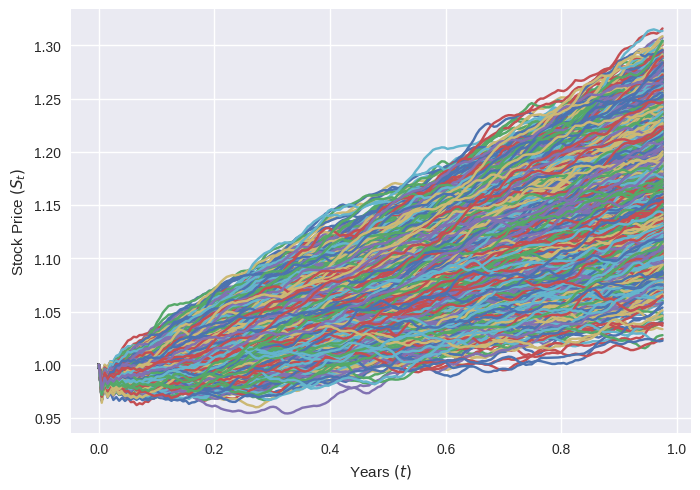

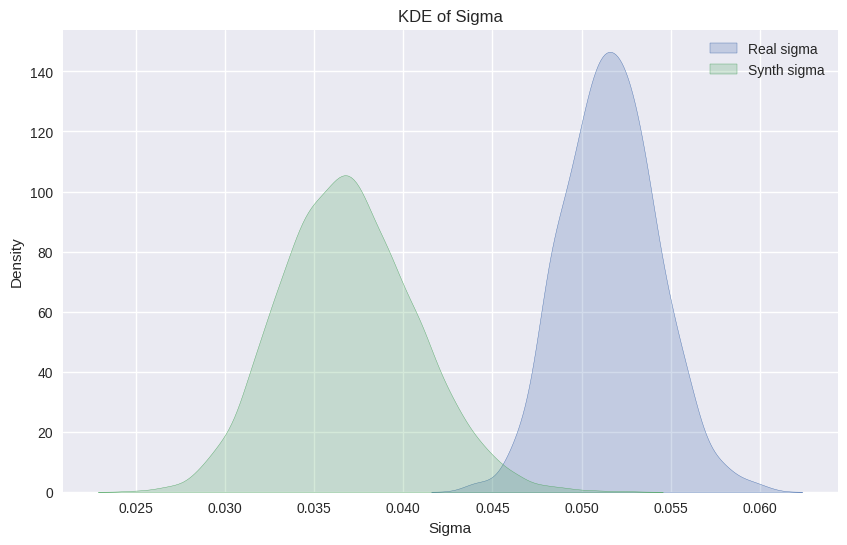

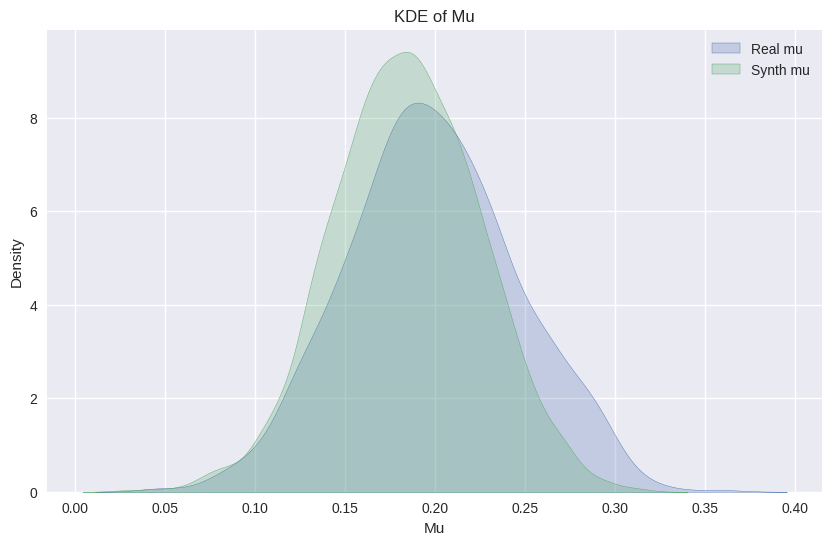

----------------------------------------------------------------------------------------------------


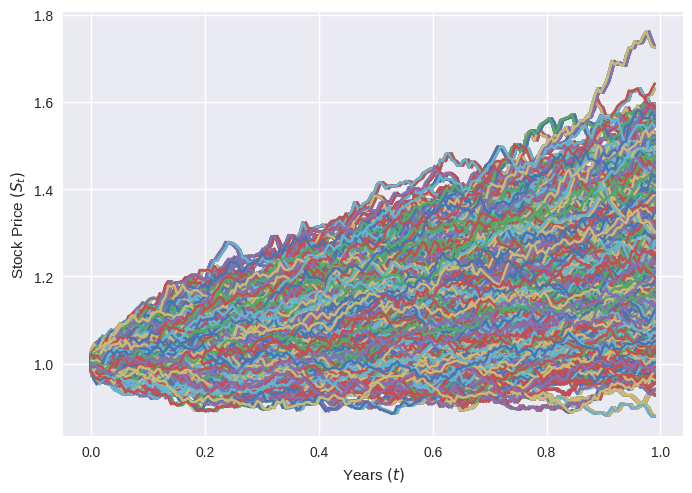

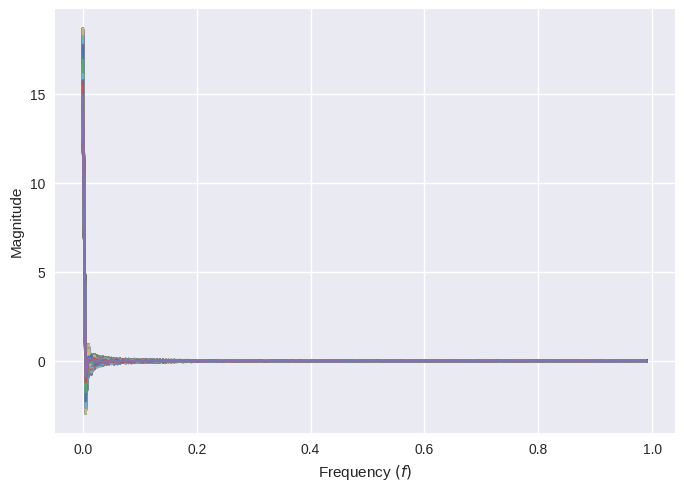

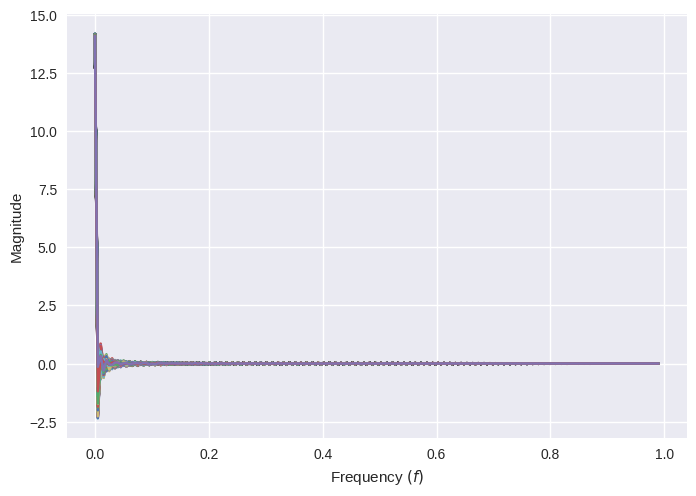

(195, 10000)


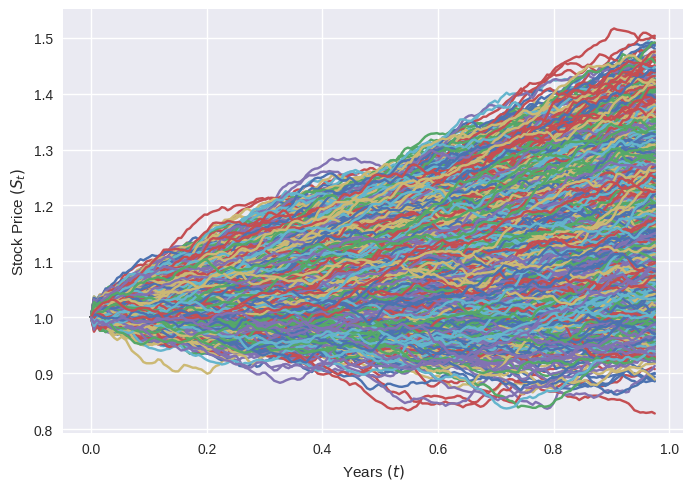

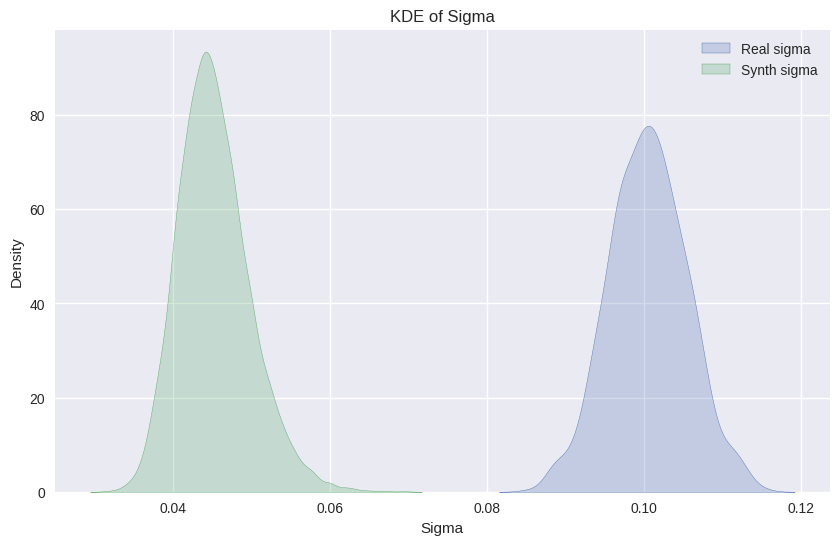

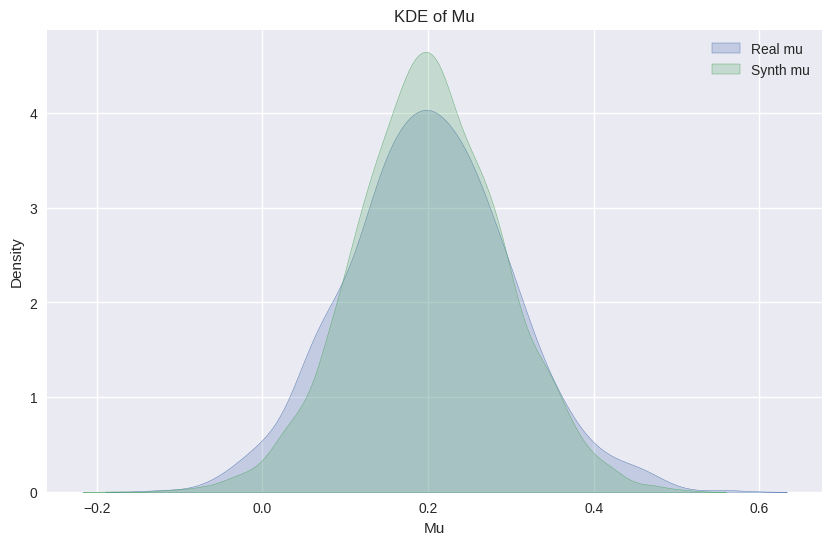

----------------------------------------------------------------------------------------------------


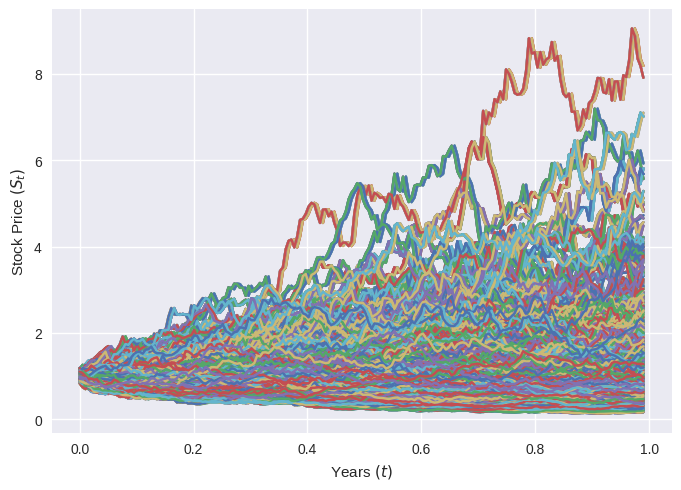

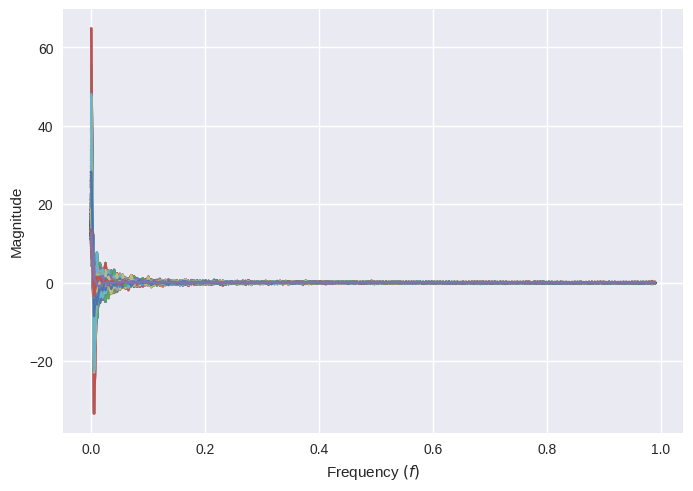

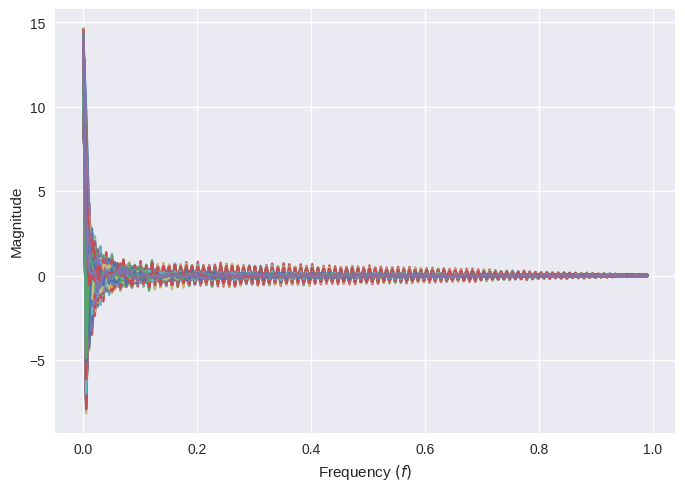

(195, 10000)


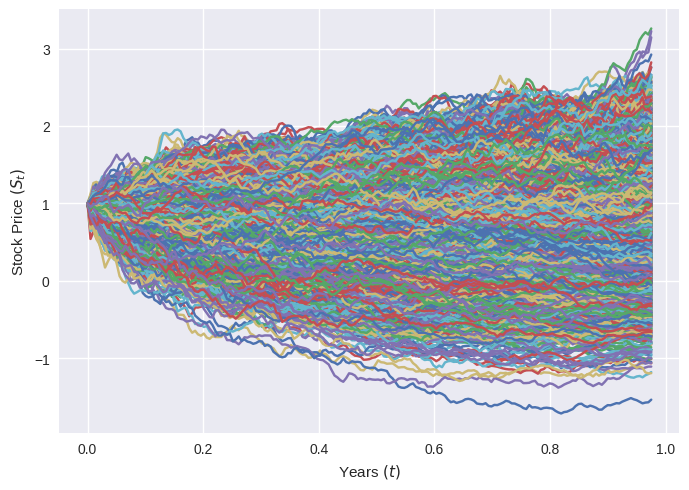

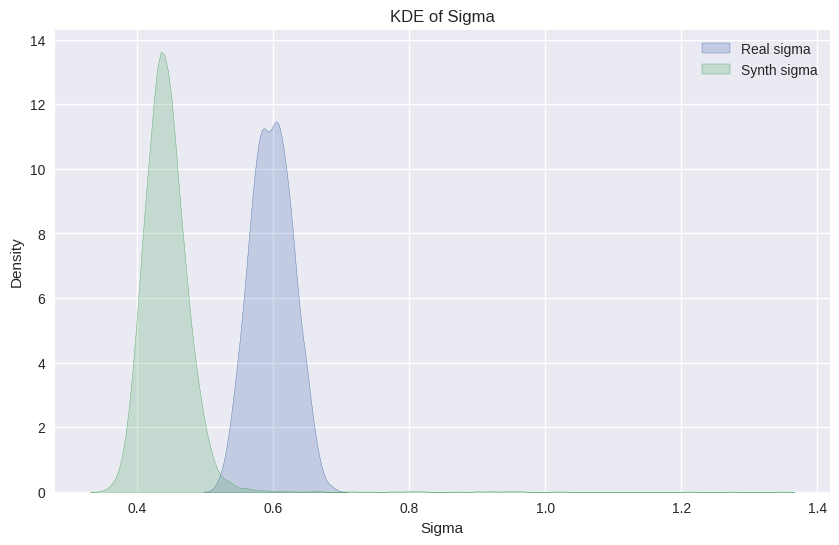

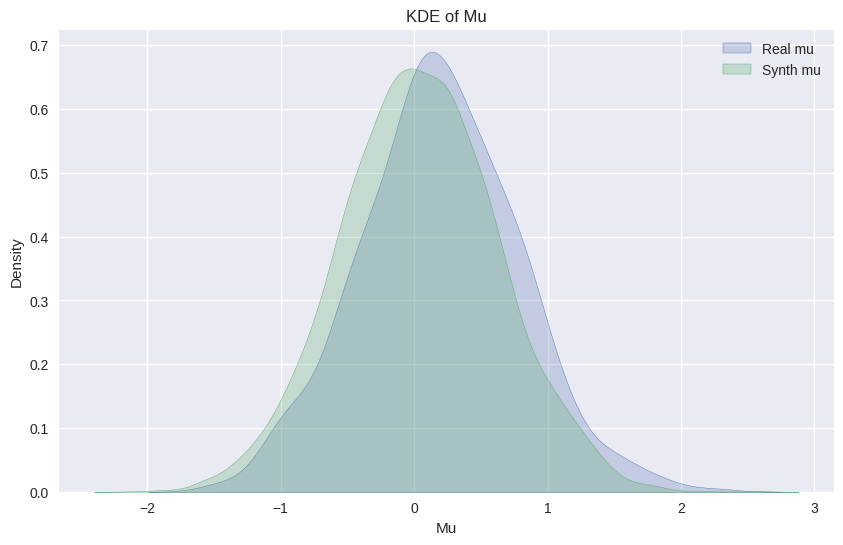

----------------------------------------------------------------------------------------------------


In [7]:

for i in range(nums_of_datasets):
    gbm_path = f'../results/exp9/generation_log-{i}/'
    data_path = gbm_path
    real = np.load(data_path + 'real_samples.npy').T
    synth = np.load(data_path + 'synth_samples.npy').T
    dataset = get_custom_dataset(f"../data/exp9/gbm-{i}.jsonl", 'D', prediction_length)
    st = np.array([item['target'] for item in list(dataset.train)]).T
    st_params = estimate_parameters(st, 1/n, ret_distribution=True)
    

    plot_gbm(real, real.shape[0], real.shape[1], 1/n)

    transformed_real = dct(real, axis=0, norm='ortho')
    plot_freq(transformed_real, transformed_real.shape[0], transformed_real.shape[1], 1/n)
    
    plot_freq(synth, synth.shape[0], synth.shape[1], 1/n)
    recovered_synth = idct(synth, axis=0, norm='ortho')[:195, :]
    print(recovered_synth.shape)
    to_plot_recovered_synth = recovered_synth + 1 - recovered_synth[0, :]
    plot_gbm(to_plot_recovered_synth, recovered_synth.shape[0], recovered_synth.shape[1], 1/n)
    
    real_params = estimate_parameters(real, 1/n, ret_distribution=True)
    synth_params = estimate_parameters(recovered_synth, 1/n, ret_distribution=True)
    
    # Create a new figure for the KDE plots of sigma
    plt.figure(figsize=(10, 6))
    sns.kdeplot(st_params[0], label='Real sigma', fill=True)
    sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
    plt.title('KDE of Sigma')
    plt.xlabel('Sigma')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Create a new figure for the KDE plots of mu
    plt.figure(figsize=(10, 6))
    sns.kdeplot(st_params[1], label='Real mu', fill=True)
    sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
    plt.title('KDE of Mu')
    plt.xlabel('Mu')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    print('-' * 100)
    
    


    
